In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl

%load_ext autoreload
%autoreload 2

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.19.dev75+a4b8edb.dirty (python 3.6.7) on 2019-09-02 20:42.


In [2]:
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=80, transparent=True)
scv.settings.plot_prefix = 'scvelo_fig4_'
scv.settings.verbosity = 2

## Data Preparation: Dentate Gyrus 

In [3]:
adata = scv.read('data/pancreas/endocrinogenesis.h5ad', cache=True)
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 25919 × 27998 
    obs: 'day', 'clusters_coarse', 'clusters'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

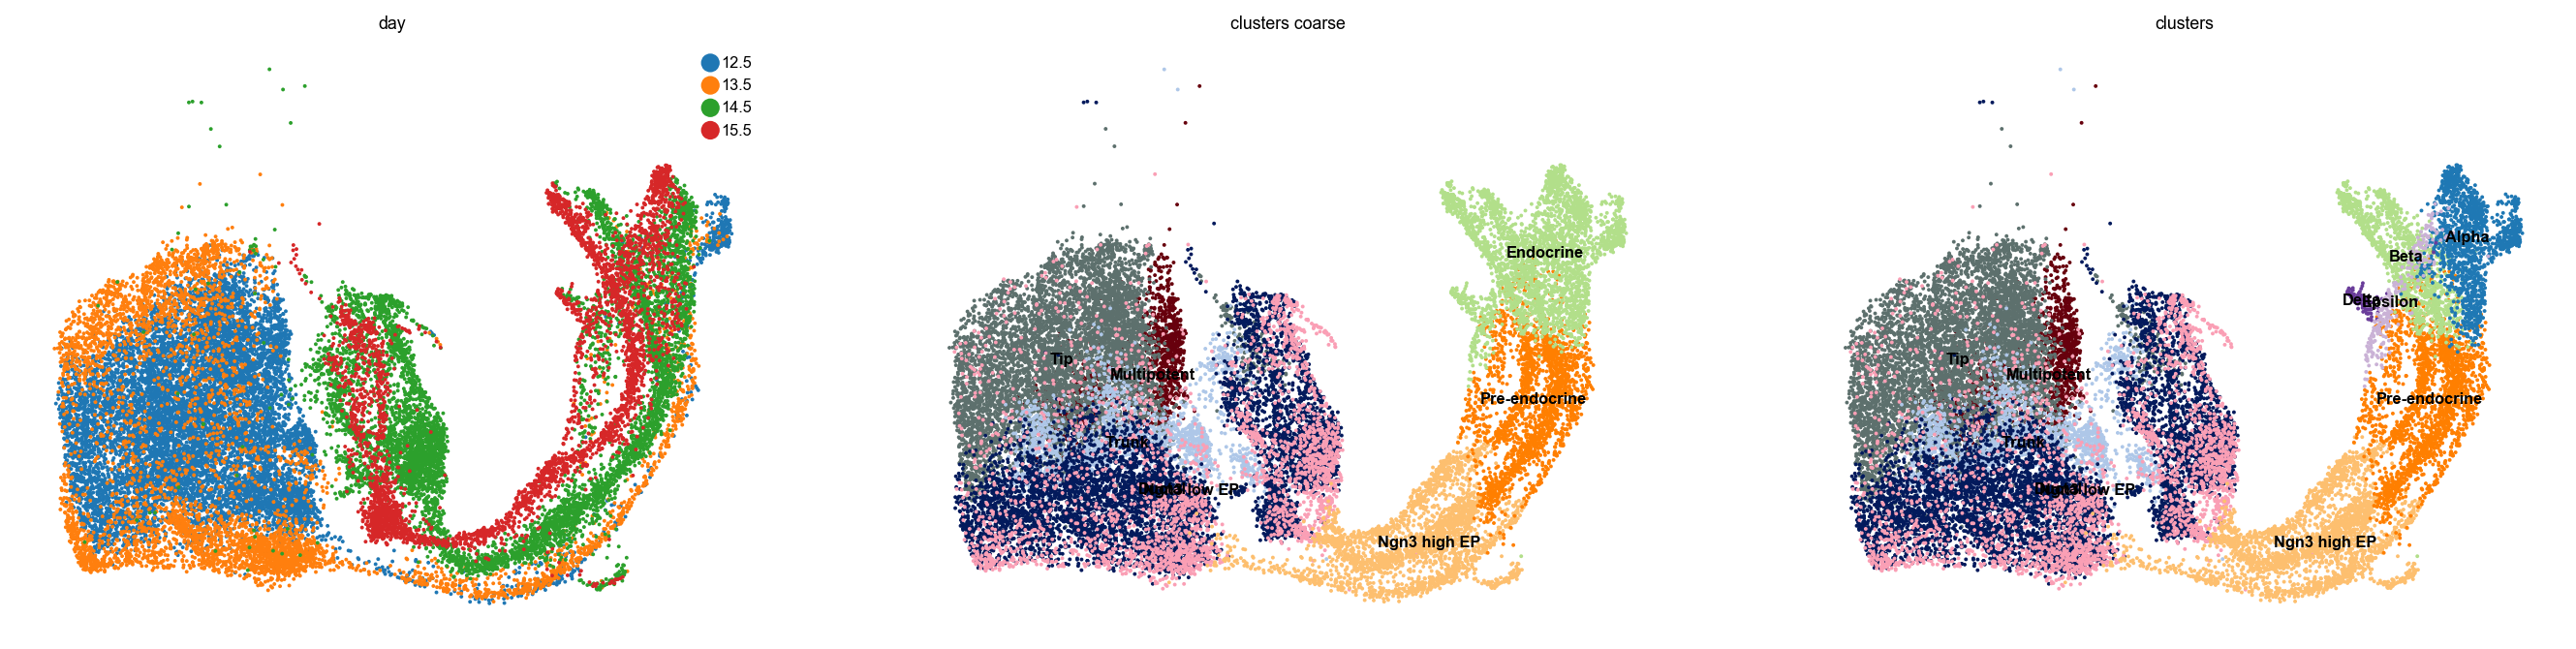

In [5]:
scv.pl.scatter(adata, color=['day', 'clusters_coarse', 'clusters'])

In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=100, n_top_genes=1000)
scv.pp.moments(adata)

Filtered out 19357 genes that are detected in less than 100 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:15)
computing moments based on connectivities
    finished (0:00:02)


In [7]:
scv.tl.diffmap(adata)

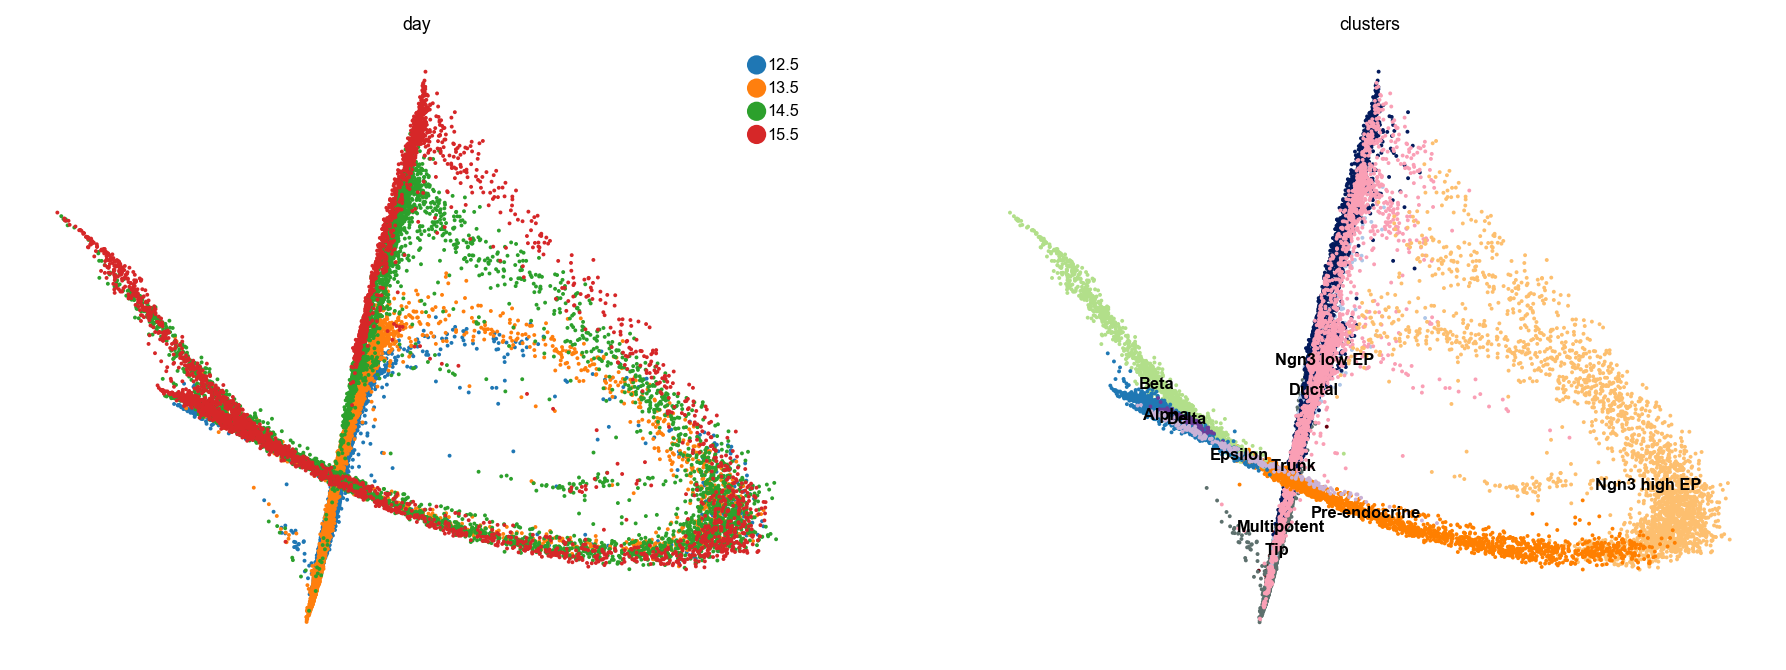

In [8]:
scv.pl.scatter(adata, basis='diffmap', components='2,3', color=['day', 'clusters'])

In [9]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01)
computing velocity graph
    finished (0:01:24)


computing velocity embedding
    finished (0:00:06)


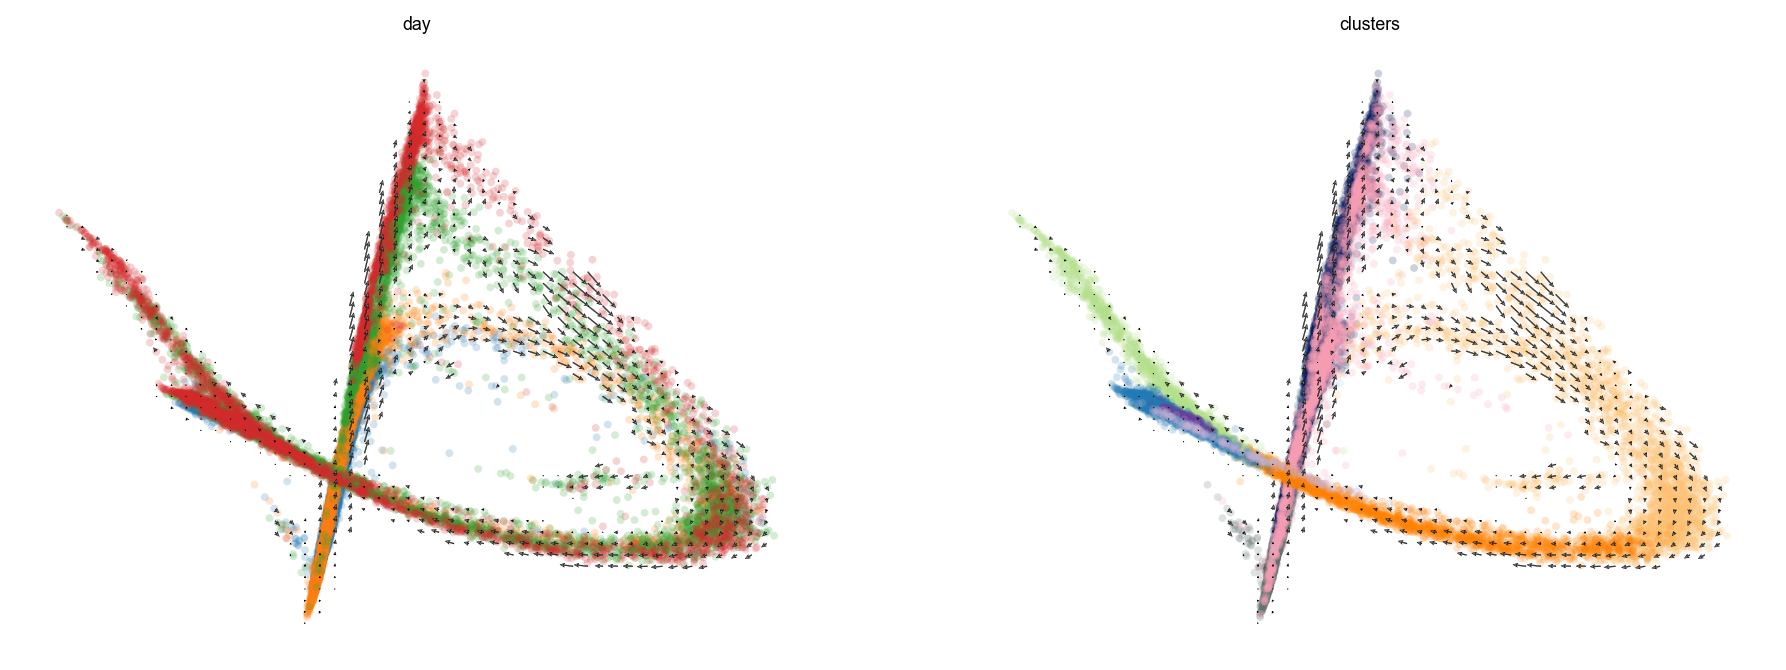

In [10]:
scv.pl.velocity_embedding_grid(adata, basis='diffmap', components='2,3', color=['day', 'clusters'])

In [11]:
from scvelo.tools.run import convert_to_loom
vlm = convert_to_loom(adata)

In [ ]:
vlm.fit_gammas()
vlm.filter_genes_good_fit()

vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift()
vlm.extrapolate_cell_at_t()

vlm.estimate_transition_prob(transform='sqrt')  # 
vlm.calculate_embedding_shift()
vlm.calculate_grid_arrows(smooth=0.5, steps=(50, 50), n_neighbors=100)

In [ ]:
scv.pl.velocity_embedding(adata, X=vlm.embedding, V=vlm.delta_embedding, scale=2, frameon=False, dpi=200)

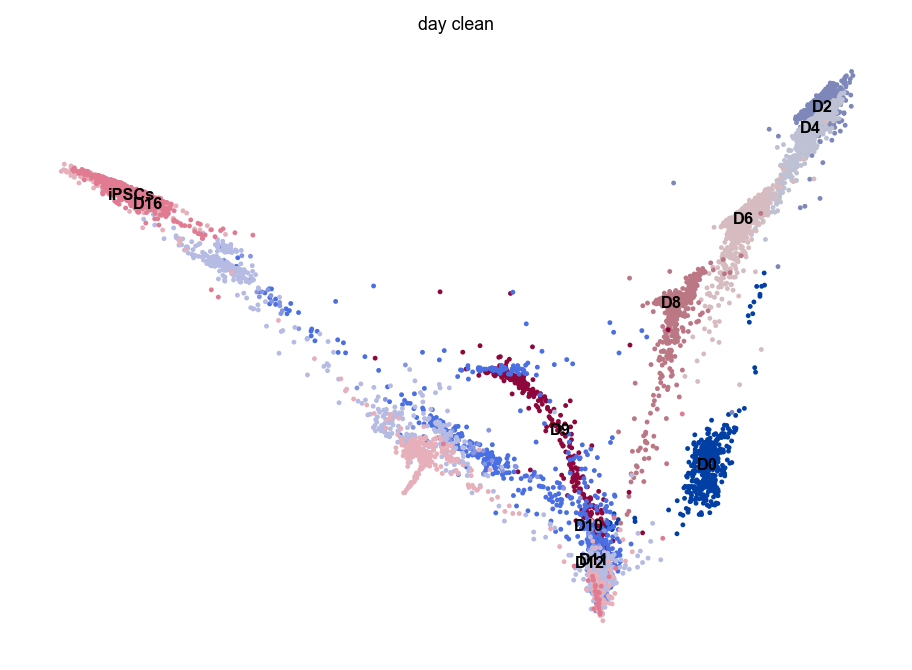

In [79]:
scv.pl.scatter(adata, basis='diffmap', color='day_clean')

In [82]:
import scanpy as sc

In [83]:
sc.tl.draw_graph(adata)

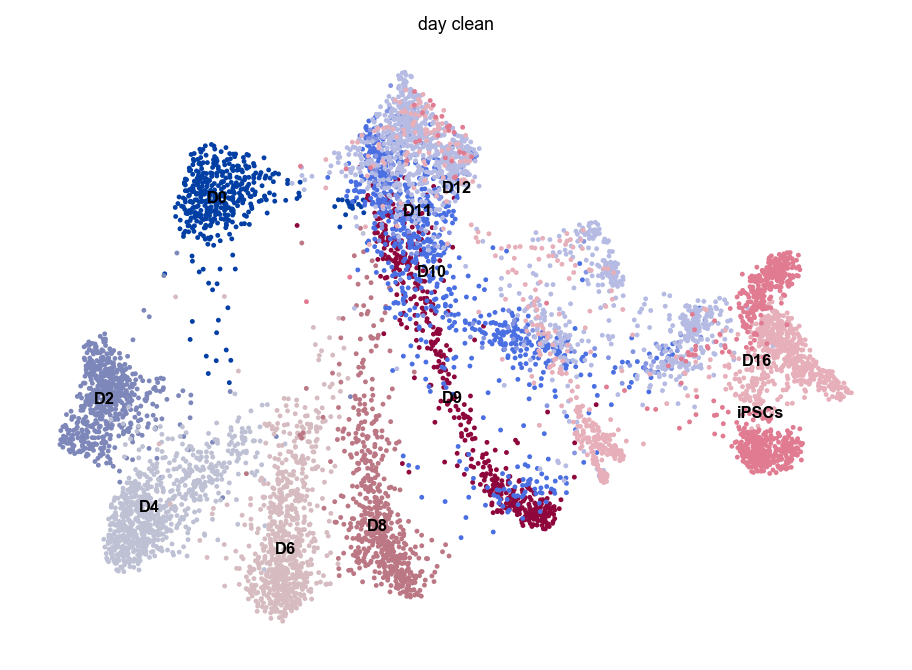

In [86]:
scv.pl.scatter(adata, basis='draw_graph_fr', color='day_clean')

computing velocity embedding
    finished (0:00:01)


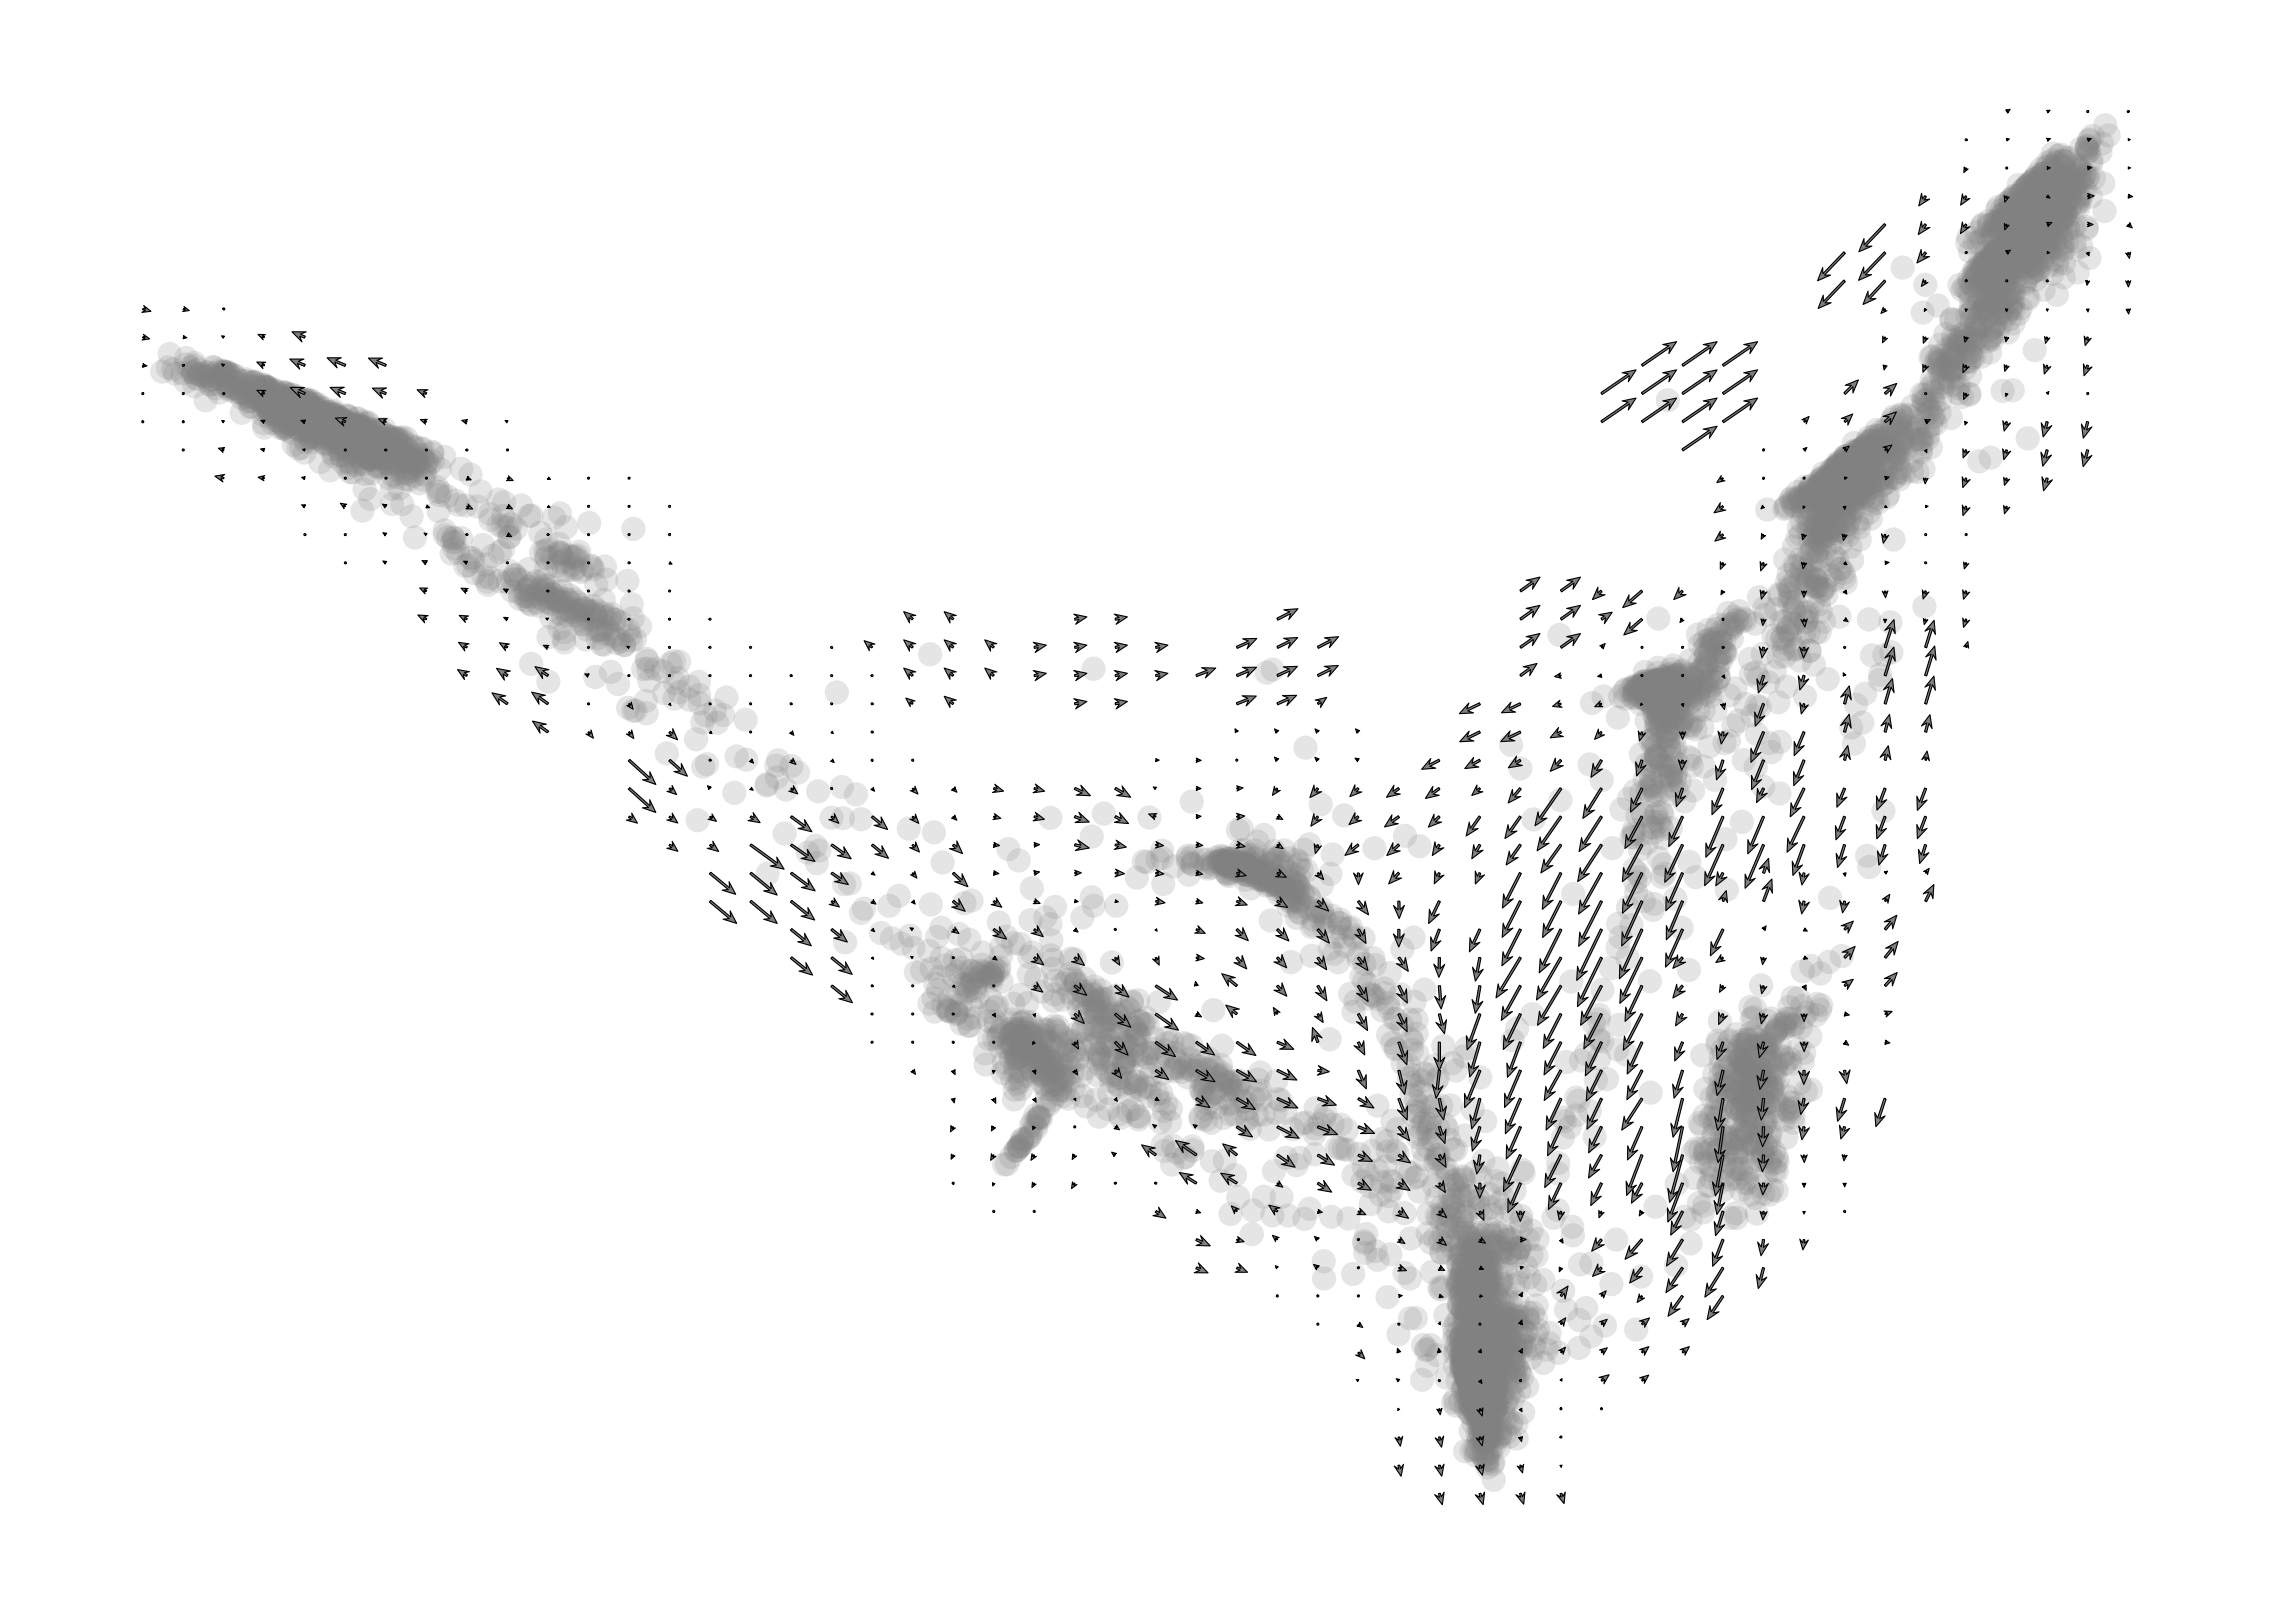

In [80]:
scv.pl.velocity_embedding_grid(adata, basis='diffmap', dpi=200)

In [48]:
scv.tl.diffmap(adata)

computing velocity embedding
    finished (0:00:05)


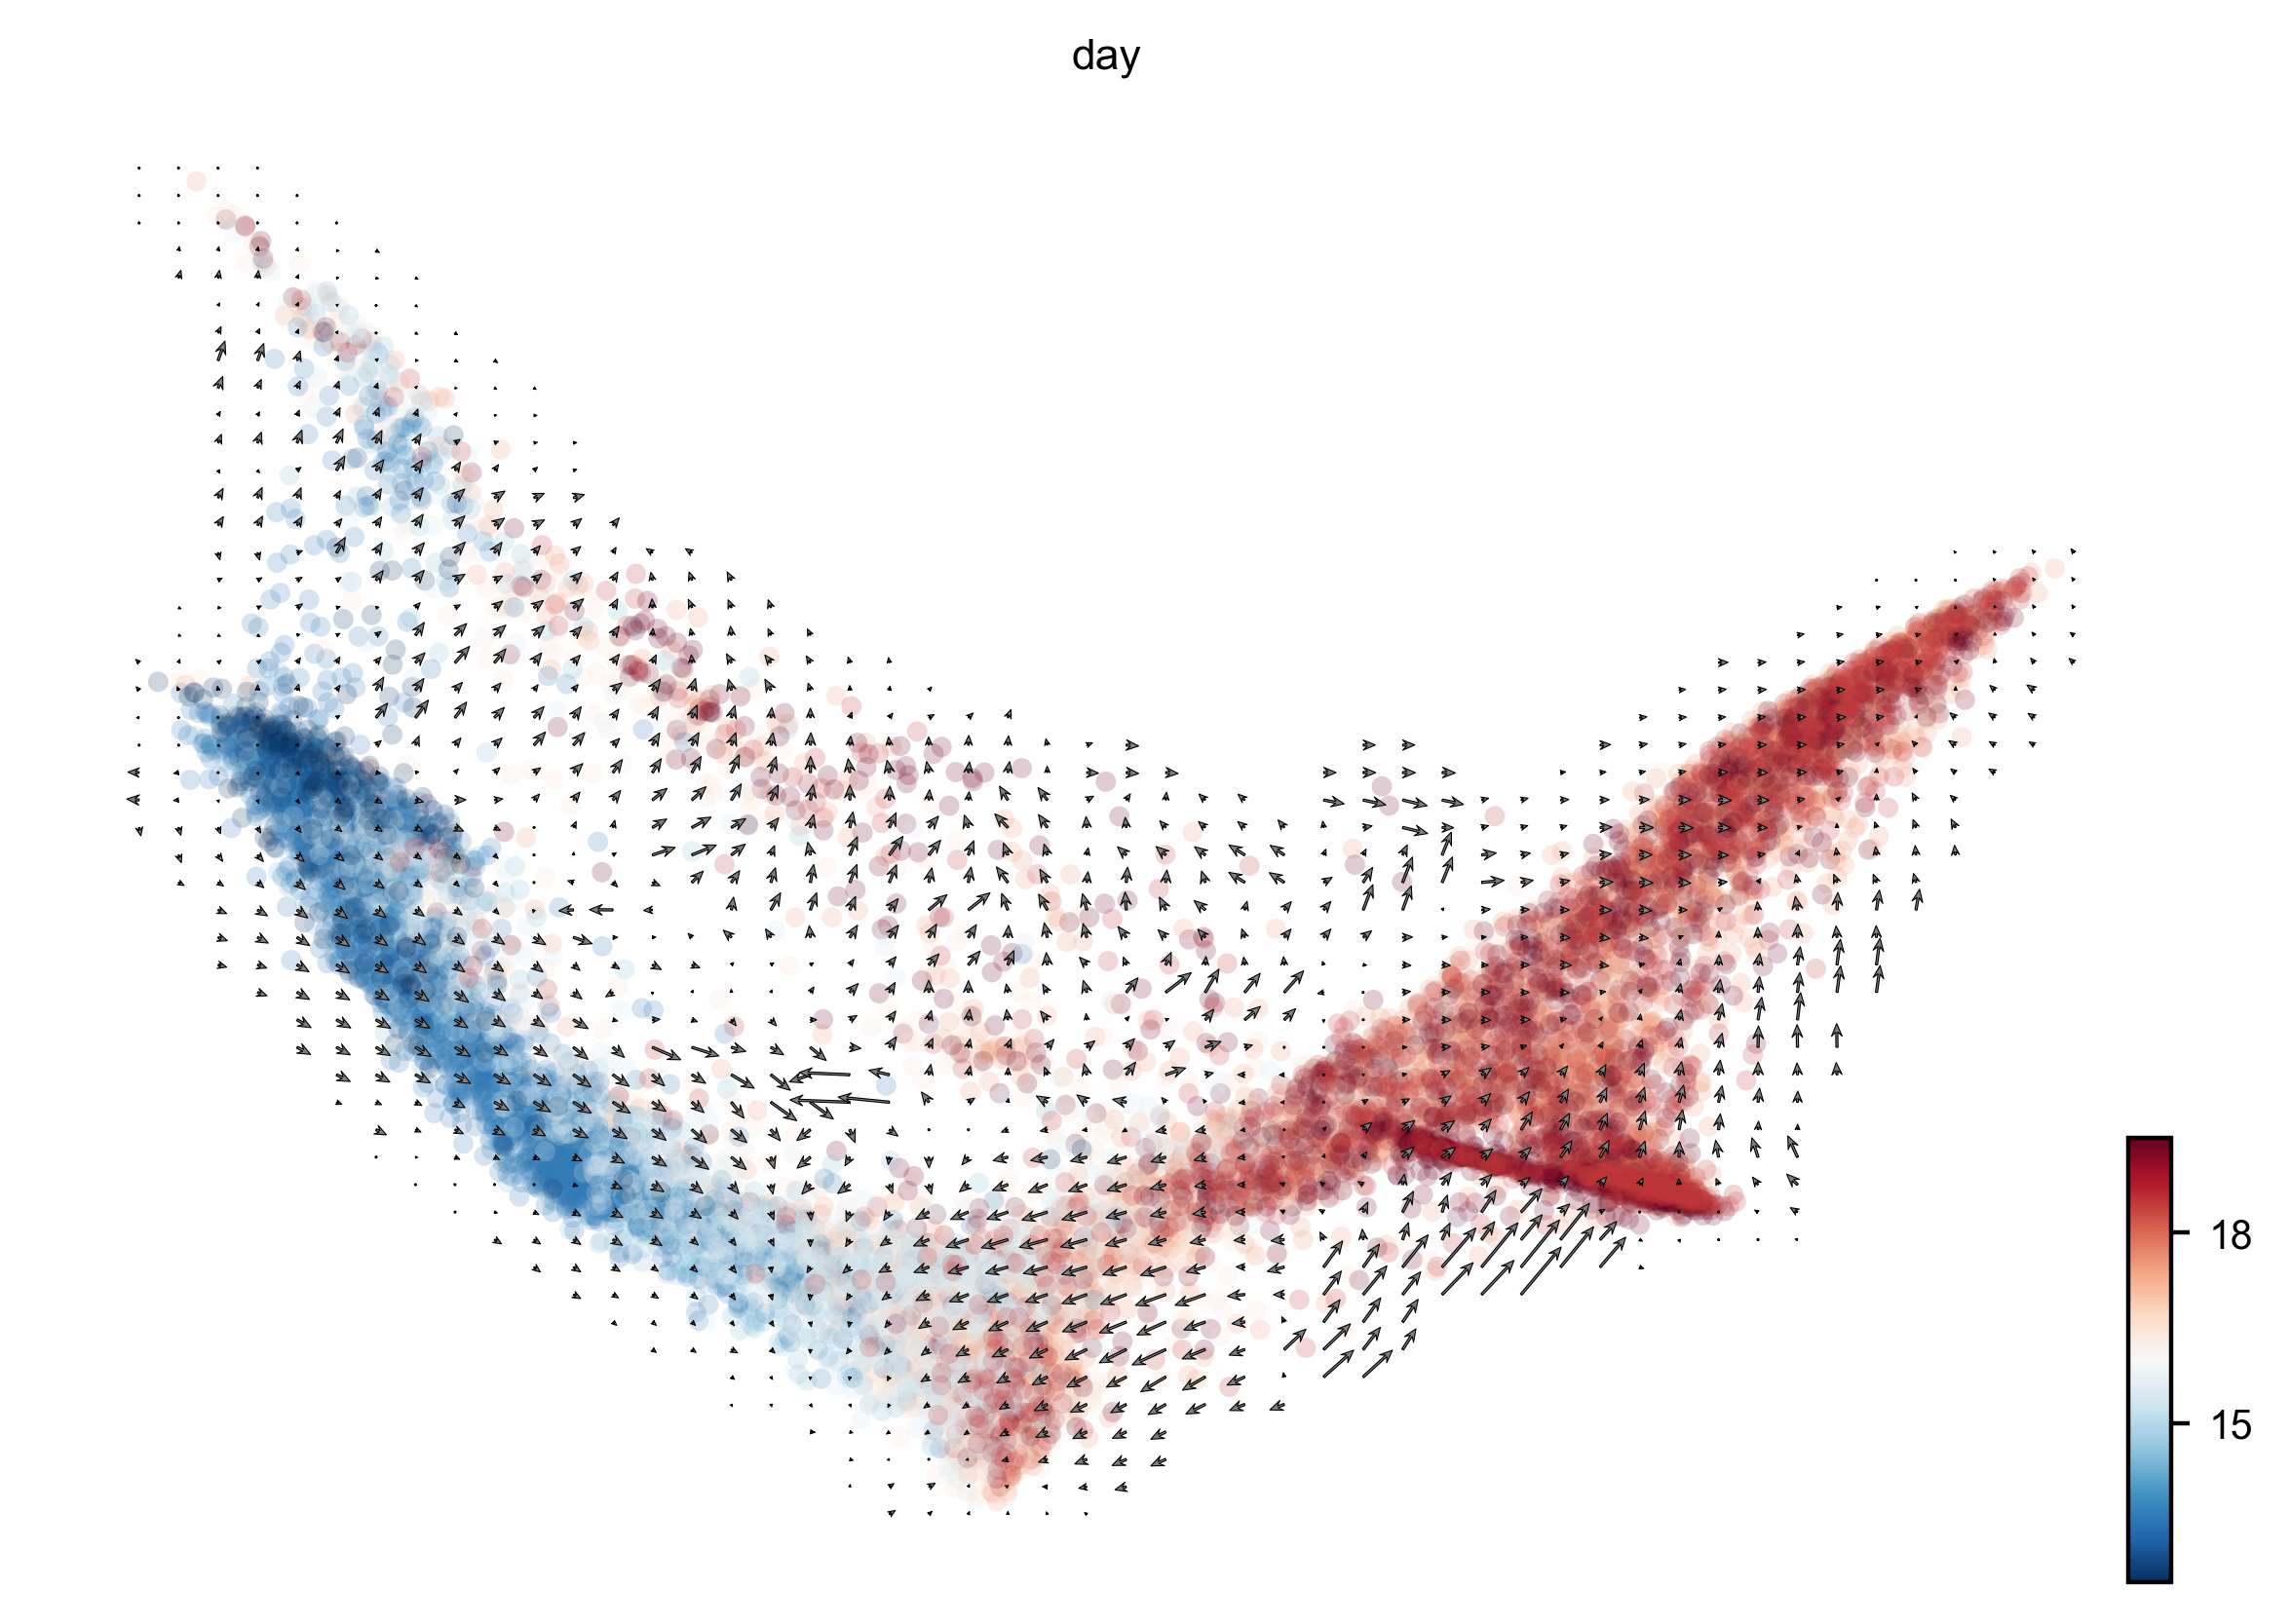

In [49]:
scv.tl.velocity_embedding(adata)
scv.pl.velocity_embedding_grid(adata, basis='diffmap', color='day', dpi=200)

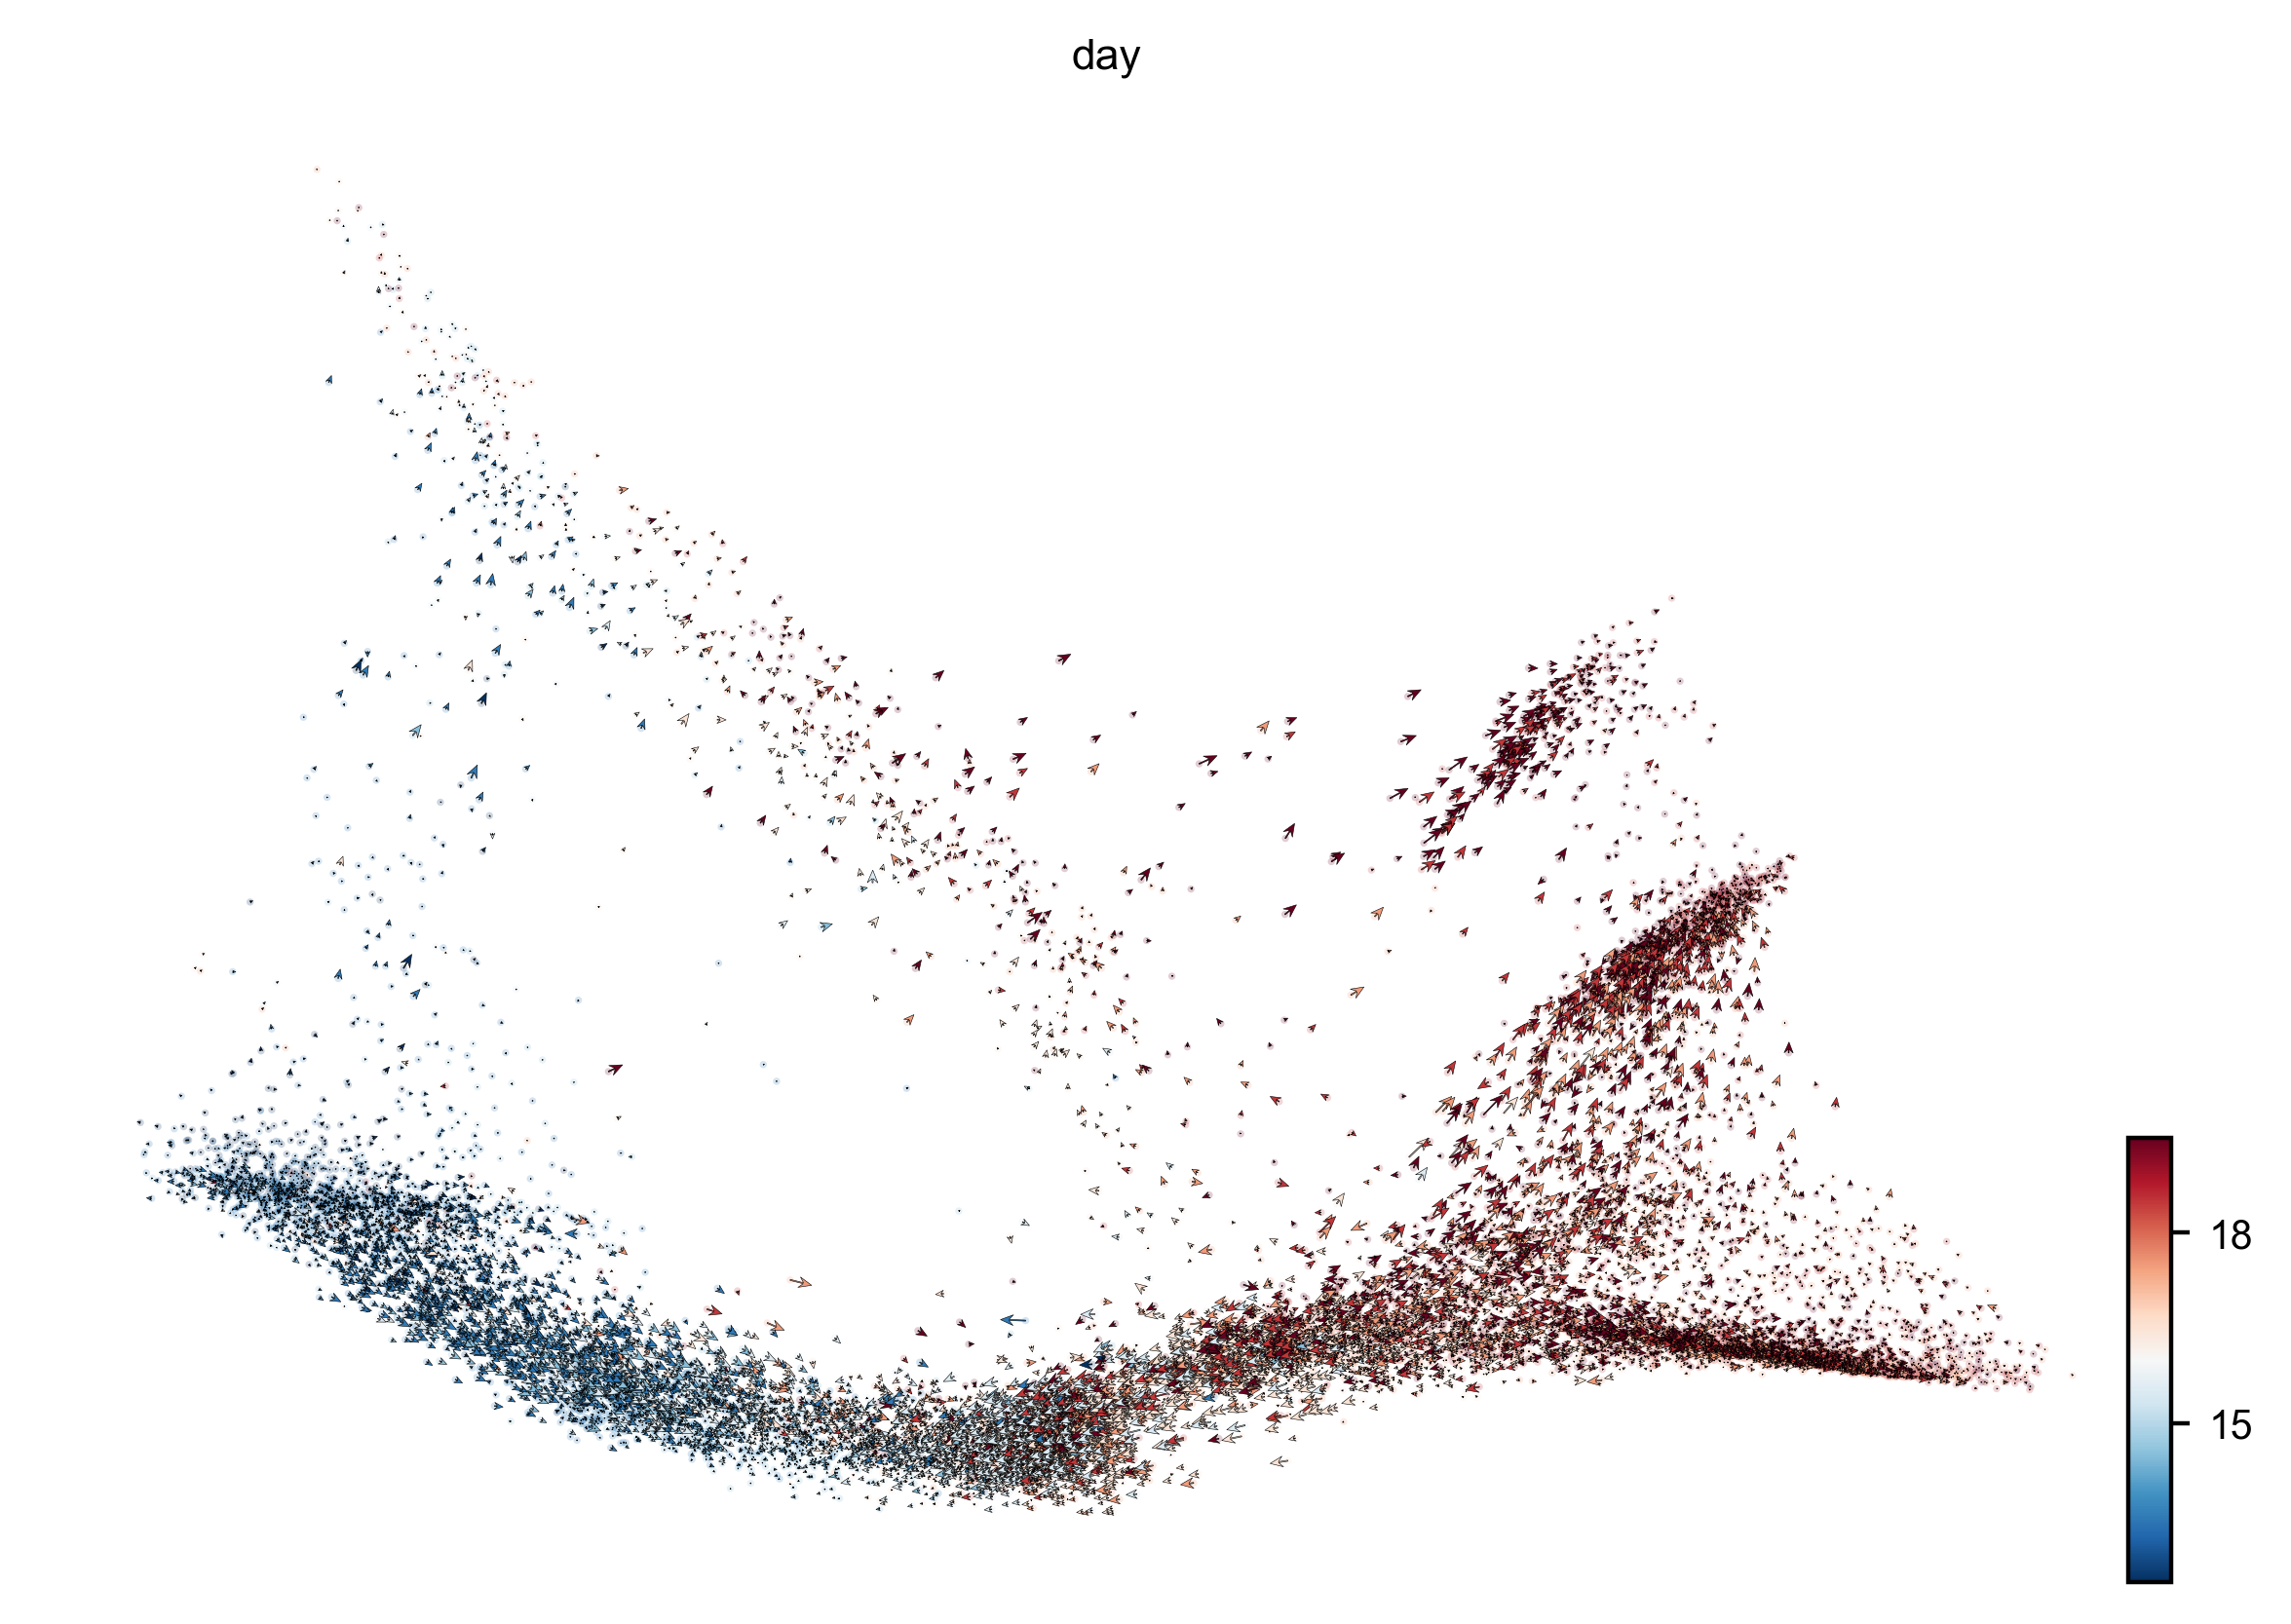

In [34]:
scv.pl.velocity_embedding(adata, basis='diffmap', color='day', scale=.5, dpi=200)

In [13]:
scv.tl.umap(adata)

In [17]:
# adata.write('data/DentateGyrus/dynmodel.h5ad')
adata = scv.read('data/DentateGyrus/dynmodel.h5ad')